<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Assignment 2: Supervisoed Machine Learning - Classification & Regression (25 marks)</center></h2>
<h2> <center> Due: . Feb 16, 2018. To be submitted on D2L Dropbox </center></h2>


This assignemnt focuses on applying basic classfication and regression techniques in the context of sofware quality and performance, in four parts. 

<h2>Part A. Defect Prediction (7 marks)</h2>
<br>

Software quality assurance (SQA) techniques (e.g., testing, code review, etc.) are among the major tasks in software development that try to eliminate software defects, as much as possible, prior to deployment. However, they are also expensive and time consuming. Therefore, it is very beneficial to narrow the scope of SQA to the parts of the software (e.g., files, classes, or even methods) that are defective. Obviously, before applying SQA, the defective parts are unknown, therefore, “software defect prediction” techniques try to use machine learning to predict which parts of the software (e.g., which files) are more likely to be defective. Thus the SQA effort can be proportionally allocated to them (more SQA resources for parts that are predicted to be defective). 

In Parts A, B, and C, you will apply several supervised machine learning techniques to a defect dataset from a software repository, which is belong to a NASA system. The dataset have collected a set of software related metrics from the history of the software, per module. They also recorded the existence of a defect per module. In other words, your feature set is the metrics array and the targets are the existence of defects. 

The goal is to build a model to predict the target based on the features from the historical data. 

To read more about the dataset and the features collected see:

NASA dataset:http://openscience.us/repo/defect/mccabehalsted/jm1.html


<h2>Binary Classification </h2>

First, you should read the NASA data that is given to you as a .csv file ( NasaData.csv ). Use pandas read_csv function for this.

After reading the data, build binary classification models with LogisticRegression, LinearSVC, GaussianNB, and KNeighborsClassifier, from SKLearn. Each model gets metrics as feature set and predicts either a defective (1) or not defective (0) label.

Take 75% of data as training set and 25% of it as test set. To eliminate the randomness when splitting the data, you should run each classification technique 30 times with seeds from [1 to 30]. 

Using model_selection's train_test_split function, randomly select 1/4 of your dataset as training and 3/4 as testset. 
Calculate accuracies per technique and repeat this for a total of 30 random runs (every run will use a different random seed in train_test_split and return a separate accuracy value per model).

Visualize the distribution of the accuracies for each model in a single box plot. All bosplots should be located in one plot, where The X_axis is the four classification techniques that you've applied and the Y_axis is the accuracies.

Identify which model (with default parametrs) has the lowest and most unreliable resuls.

Improve that model to be almost in par with others, using regularization.

*** Note1 you must use pandas for both reading from CSV and visualizing boxplots ***
<br>

*** Note2 only show final results. That is after regularization for the worst technique, together with defaults for other techniques ***


<b>Your Answer:</b> ...................

(0, 1)

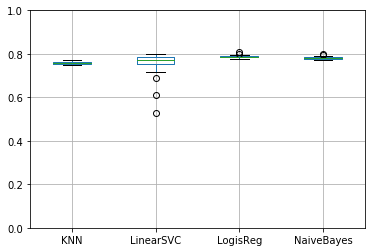

In [5]:
## Part A.1. Solution

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

def CSV_Reader(Filename):
  data_target=pd.read_csv(Filename)
  return [data_target.iloc[:,:-1],data_target.iloc[:,-1]]


features,lables=CSV_Reader("NasaData.csv")


LogisReg_Scores=[]
SVM_Scores=[]
GaussNaiveBayes_Scores=[]
KNN_Scores=[]
for i in range(1,31):
    
    X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=i)
   
    LogisReg = LogisticRegression().fit(X_train, y_train)
    SVM=LinearSVC(C=0.0001).fit(X_train, y_train)
    GaussNaiveBayes = GaussianNB().fit(X_train, y_train)
    KNN = KNeighborsClassifier().fit(X_train, y_train)
    
    LogisReg_Scores.append(LogisReg.score(X_test, y_test))
    SVM_Scores.append(SVM.score(X_test, y_test))
    GaussNaiveBayes_Scores.append(GaussNaiveBayes.score(X_test, y_test))
    KNN_Scores.append(KNN.score(X_test, y_test))

axis=pd.DataFrame({"LogisReg":LogisReg_Scores,"LinearSVC":SVM_Scores, "NaiveBayes":GaussNaiveBayes_Scores, "KNN":KNN_Scores}).boxplot(return_type="axes")
axis.set_ylim([0,1])



<h1>Part B. Model complexity (6 marks)</h1>
<br><br>
In this part, we will focus only on the kNN algorithm and try to tune model complexity as well as trying out another disctance function than the default.
<h2>Part B.1. KNN complexity tuning (3 marks)</h2>
In this part, we want to tune the value k in kNN for our NASA dataset. To do so, you should find a sweet spot that the model is neither overfitted nor underfitted. 
Here again take the NASA dataset and apply the model_selection's train_test_split with 75% training and 25% test data, but with a fix random_state=42.  

Then build a K-Nearest-Neighbors model using k=1,3,5,..,49. Finally, plot the accuracy of your models on the training dataset and the testing dataset, using two lines in one plot.  

Using this plot identify what the best value is for k.

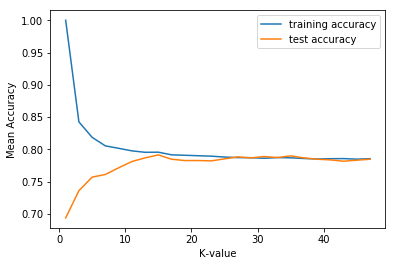

In [55]:
## Part B.1. Solution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def PlotDrawer(Plot_one,Plot_Two,X_axis):
    plt.plot(X_axis,Plot_one,label="training accuracy")
    plt.plot(X_axis,Plot_Two,label="test accuracy")
    plt.ylabel('Mean Accuracy')
    plt.xlabel('K-value')
    plt.legend()
    #plt.ylim(ymin=0)
    plt.show()

features,lables=CSV_Reader("NasaData.csv")

X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=42)

TrainingAcurracy=[]
TestingAcurracy=[]
DifferentK=[i*2-1 for i in range(1,25)]
for K in DifferentK:
    KNN = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
    TrainingAcurracy.append(KNN.score(X_train, y_train))
    TestingAcurracy.append(KNN.score(X_test, y_test))

PlotDrawer(TrainingAcurracy,TestingAcurracy,DifferentK)


<h2>Part B.2. KNN weight parameter (3 marks)</h2>

Report your Part B.1. experiment but with KNN's 'weights' parameter set to 'distance'.

Visualize the new results. 

Explain what has happend and why. 

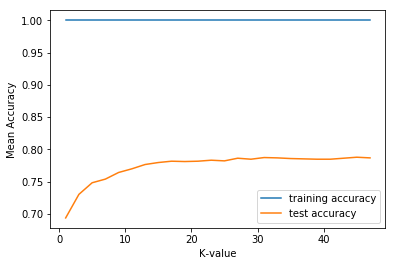

In [56]:
## Part B.2. Solution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def PlotDrawer(Plot_one,Plot_Two,X_axis):
    plt.plot(X_axis,Plot_one,label="training accuracy")
    plt.plot(X_axis,Plot_Two,label="test accuracy")
    plt.ylabel('Mean Accuracy')
    plt.xlabel('K-value')
    plt.legend()
    #plt.ylim(ymin=0)
    plt.show()

features,lables=CSV_Reader("NasaData.csv")

X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=42)

TrainingAcurracy=[]
TestingAcurracy=[]
DifferentK=[i*2-1 for i in range(1,25)]
for K in DifferentK:
    KNN = KNeighborsClassifier(n_neighbors=K, weights="distance").fit(X_train, y_train)
    TrainingAcurracy.append(KNN.score(X_train, y_train))
    TestingAcurracy.append(KNN.score(X_test, y_test))

PlotDrawer(TrainingAcurracy,TestingAcurracy,DifferentK)


Answer:...

<h1>Part C. Combining Models (8 marks)</h1>

The goal of this section is to try to maximize our defect prediction accuracy on NASA dataset, by combining three models in Part A: (Logistic Regression, Gaussian Naive Bayes, and K-Nearest Neighbour) into one prediction.

To do so, you need to implement a function, called Combine, that returns the weighted average votes, for any three models that it receives. 

Combine works as follows: 

1) Each model is trained individually 

2) Each model predicts the test set data points and calculates estimation probalibitiets as given by the models

3) The final score per data point in the test set is calculated by the following formula:

score=Sum(predict_i*probability_i)/3)

where predict_i is the prediction by model_i (predictions are either -1 OR +1 for the two binary classes) and probability_i is the estimation probability (predict_proba) given by model_i.

4) Finally, the weighted average vote is ZERO if the score is less than or equal to zero otherwise the weighted average vote is ONE


Finally, calculate the accuracy of the combined model on the test data as follows:

    Accuracy= number_of_Correct_prediction / total_number_of_predictions 
    
All three models should be called by their default parameters as in Part A.
    
The same as Part A run the Combine model 30 times (with different random seeds) and visualize the results beside the indivudal models' reults, from Part A with a pandas boxplot.

<font color='red'>Note1: Use numpy and Pandas as much as possible to increase performance </font>

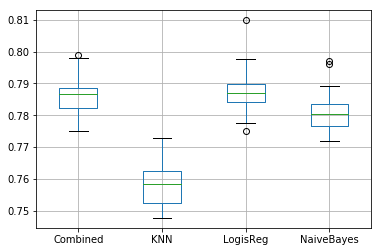

In [60]:
## Part C.1. Solution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

def Score(Predictions,Lables):

    CorrectPredictions=0
    for i,Pred in enumerate(Predictions):
        if Pred== Lables[i]:
            CorrectPredictions+=1
    return CorrectPredictions/len(Lables)

def Vote(Vote_one,Vote_two,Vote_three):
    if Vote_one[0]==Vote_two[0] and Vote_two[0]==Vote_three[0]:
        return Vote_one[0]

    if (Vote_one[0]*Vote_one[1]+Vote_two[0]*Vote_two[1]+Vote_three[0]*Vote_three[1])/(Vote_one[1]+Vote_two[1]+Vote_three[1]) >= 0.5:
        return max([max([Vote_one[0],Vote_two[0]]),Vote_three[0]])
    else:
        return min([min([Vote_one[0],Vote_two[0]]),Vote_three[0]])


def combine(features, lables, Func_one, Func_two,Func_three,seed):
    X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=seed)

    Model_one =  Func_one().fit(X_train, y_train)
    Model_two = Func_two().fit(X_train, y_train)
    Model_three =  Func_three().fit(X_train, y_train)
    
    Model_one_preds=Model_one.predict(np.array([observation for observation in X_test]))
    Model_one_probs=np.array([max(probList) for probList in Model_one.predict_proba(np.array([observation for observation in X_test]))])

    Model_two_preds=Model_two.predict(np.array([observation for observation in X_test]))
    Model_two_probs=np.array([max(probList) for probList in Model_two.predict_proba(np.array([observation for observation in X_test]))])

    Model_three_preds=Model_three.predict(np.array([observation for observation in X_test]))
    Model_three_probs=np.array([max(probList) for probList in Model_three.predict_proba(np.array([observation for observation in X_test]))])

    Combined_Preds=np.array([Vote([Model_one_preds[i],Model_one_probs[i]],[Model_two_preds[i],Model_two_probs[i]],[Model_three_preds[i],Model_three_probs[i]]) for i in range(len(X_test))])

    return Score(Combined_Preds,y_test)


features,lables=CSV_Reader("NasaData.csv")


LogisReg_Scores=[]
GaussNaiveBayes_Scores=[]
KNN_Scores=[]
Combined_scores=[]

for i in range(1,31):
    
    X_train, X_test, y_train, y_test = train_test_split(
    features.values, lables.values,test_size=0.25,random_state=i)
    
    LogisReg = LogisticRegression().fit(X_train, y_train)
    GaussNaiveBayes = GaussianNB().fit(X_train, y_train)
    KNN = KNeighborsClassifier().fit(X_train, y_train)
    
    LogisReg_Scores.append(LogisReg.score(X_test, y_test))
    GaussNaiveBayes_Scores.append(GaussNaiveBayes.score(X_test, y_test))
    KNN_Scores.append(KNN.score(X_test, y_test))

    Combined_scores.append(combine(features.values, lables.values,LogisticRegression,GaussianNB,KNeighborsClassifier,i))


axis=pd.DataFrame({"LogisReg":LogisReg_Scores, "NaiveBayes":GaussNaiveBayes_Scores, "KNN":KNN_Scores,"Combined":Combined_scores}).boxplot(return_type="axes")
# axis.set_ylim([0,1])





<h1>Part D. Regression (4 marks)</h1>


In this section, we will use a new data set which is related to the performance of several CPUs. These CPUs are of different specifications, and you have the estimated relative performance(ERP) metric per CPU, in this data set.

columns of data set are as follows:

    MYCT: machine cycle time in nanoseconds (integer) 
    MMIN: minimum main memory in kilobytes (integer) 
    MMAX: maximum main memory in kilobytes (integer) 
    CACH: cache memory in kilobytes (integer) 
    CHMIN: minimum channels in units (integer) 
    CHMAX: maximum channels in units (integer) 
    PRP: published relative performance (integer) 
    ERP: estimated relative performance from the original article (integer)



<h2>Part D.1. Ridge (2 marks)</h2>
<br>
Read the data that is given to you as a CSV file ("CPU_Performance.csv") and take 75% of it as training set and 25% of it as test set with random_state=42. Using linear Regression and Ridge predict ERP using the other columns as features. To see how good you can predict on new CPUs performance, print the score of these two models on training set and test set data. 

Use the default setup for the models.


In [58]:
## Part D.1. Solution

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

features,lables=CSV_Reader("CPU_Performance.csv")

X_train, X_test, y_train, y_test = train_test_split(
    features, lables,test_size=0.25,random_state=42)


lr = LinearRegression().fit(X_train, y_train)
print("*"*4," Linear Regression Prediction Result ","*"*4)
print("\tTraining set score: {:.3f}".format(lr.score(X_train, y_train)))
print("\tTest set score: {:.3f}\n".format(lr.score(X_test, y_test)))

ridge_model = Ridge().fit(X_train, y_train)
print("*"*4," Ridge Prediction Result ","*"*4)
print("\tTraining set score: {:.3f}".format(ridge_model.score(X_train, y_train)))
print("\tTest set score: {:.3f}\n".format(ridge_model.score(X_test, y_test)))


****  Linear Regression Prediction Result  ****
	Training set score: 0.956
	Test set score: 0.895

****  Ridge Prediction Result  ****
	Training set score: 0.956
	Test set score: 0.895



<h2>Part D.2. Lasso (2 marks)</h2>


In this section, first tune the Ridge model using regularization, to imprive R^2. 

Then use Lasso on the same train and test set. Tune Lasso to minimize the number of selected features but still achive higher R^2 than the Linear regression results in Part D.1.

Reprot the R^2 and the seleted features.


<b>Your Answer</b>: ...

In [59]:
## Part D.2. Solution

better_ridge = Ridge(alpha=40).fit(X_train, y_train)
print("*"*4," Better Ridge Prediction Result ","*"*4)
print("\tTraining set score: {:.2f}".format(better_ridge.score(X_train, y_train)))
print("\tTest set score: {:.2f}\n".format(better_ridge.score(X_test, y_test)))

heading=list(features.columns.values)

better_lasso=Lasso(alpha=100).fit(X_train, y_train)
print("*"*4," Lasso Prediction Result ","*"*4)
print("\tTraining set score: {:.3f}".format(better_lasso.score(X_train, y_train)))
print("\tTest set score: {:.3f}".format(better_lasso.score(X_test, y_test)))
print("\tNumber of features used: {}".format(np.sum(better_lasso.coef_ != 0)))
print("\tFeatures used: {}\n".format([heading[i] for i in range(len(heading))if better_lasso.coef_[i] != 0]))


****  Better Ridge Prediction Result  ****
	Training set score: 0.96
	Test set score: 0.90

****  Lasso Prediction Result  ****
	Training set score: 0.952
	Test set score: 0.901
	Number of features used: 5
	Features used: ['MYCT', 'MMIN', 'MMAX', 'CACH', 'PRP']

